total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


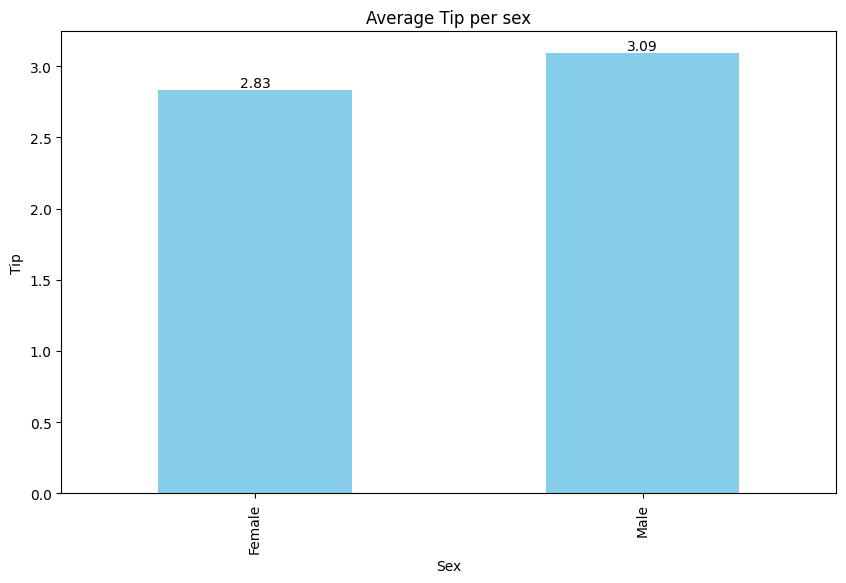

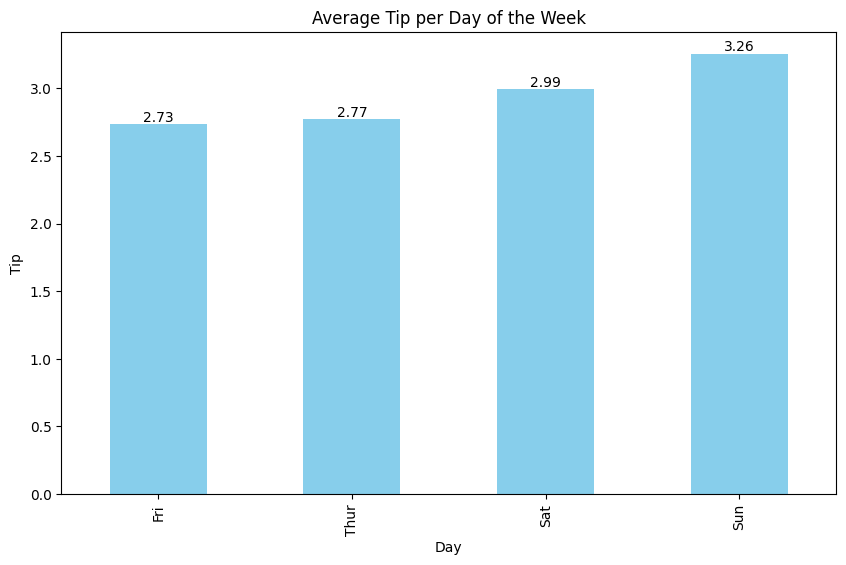

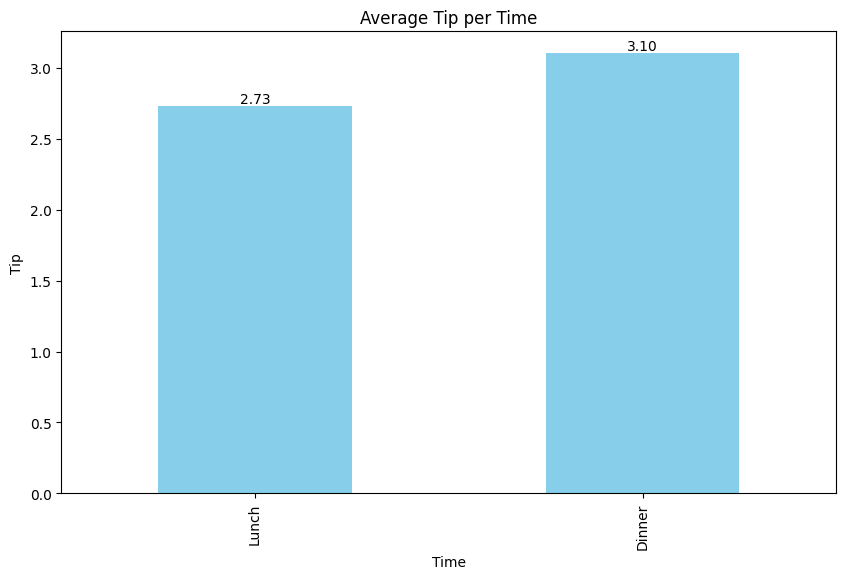

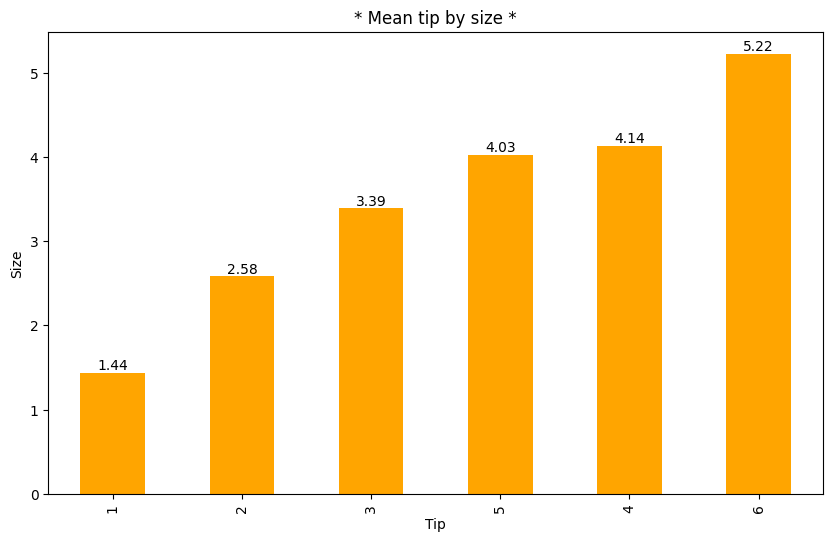

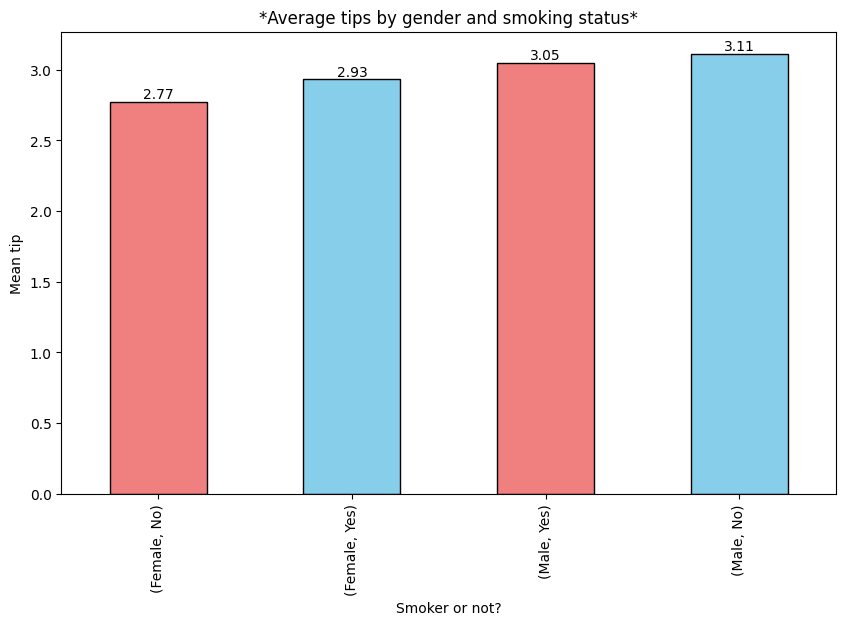

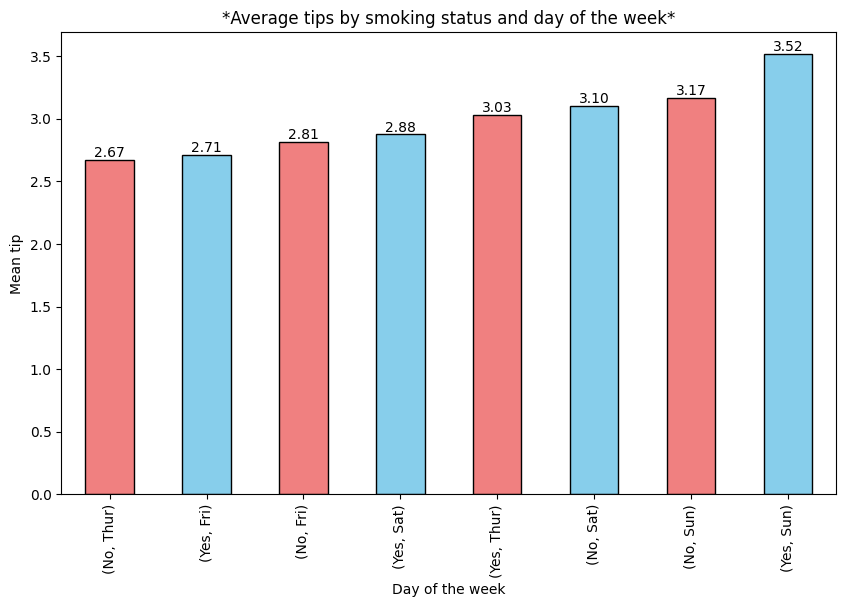

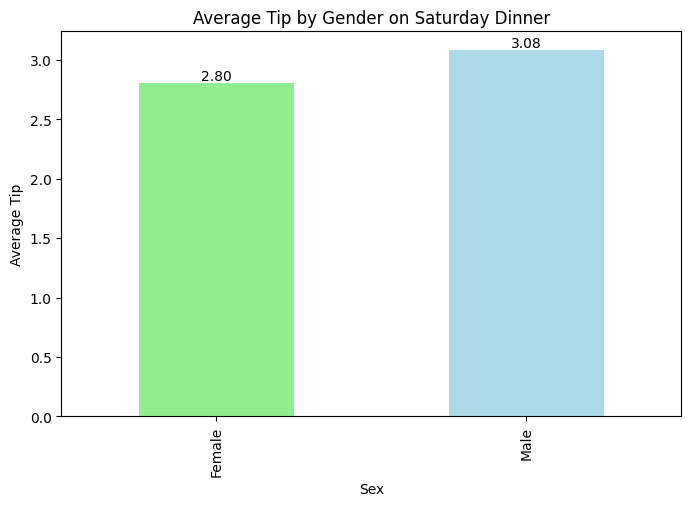

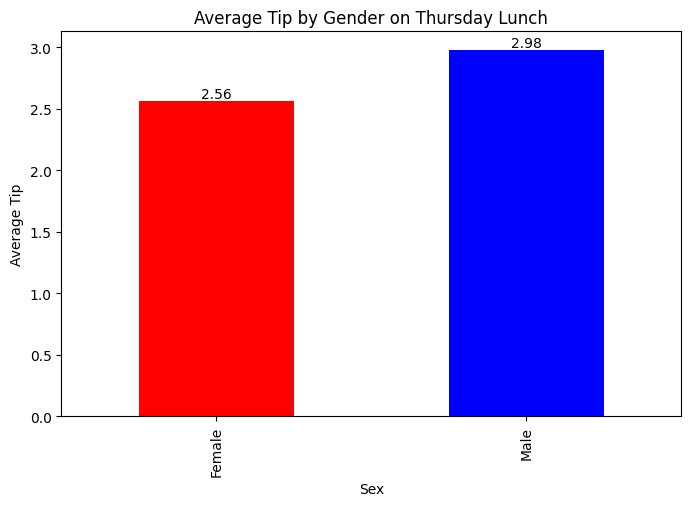

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')

# چک کردن مقادیر خالی و جایگزینی آنها
print(df.isnull().sum())
df.fillna(0, inplace=True)

#برچسب مقدار روی ستون ها
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

#محاسبه میانگین انعام
df ['Main tip'] = df['tip'] / df['total_bill']  * 100

#میانگین ها
sorted_mean_tip_by_sex = df.groupby('sex')['tip'].mean().sort_values()
sorted_median_tip_by_sex = df.groupby('sex')['tip'].median()

sorted_mean_tip_per_day = df.groupby('day')['tip'].mean().sort_values()
sorted_median_tip_per_day = df.groupby('day')['tip'].median()

sorted_mean_tip_by_time = df.groupby('time')['tip'].mean().sort_values()
sorted_median_tip_by_time = df.groupby('time')['tip'].median()

sorted_mean_tip_by_size = df.groupby('size')['tip'].mean().sort_values()
sorted_median_tip_by_size = df.groupby('size')['tip'].median()

sorted_mean_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].mean().sort_values()
sorted_median_tip_by_sex_smoker = df.groupby(['sex', 'smoker'])['tip'].median()

sorted_mean_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].mean().sort_values()
sorted_median_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].median()

#تنظیمات نمودار
plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_sex.plot(kind='bar', color='skyblue')
plt.title('Average Tip per sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_per_day.plot(kind='bar', color='skyblue')
plt.title('Average Tip per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_time.plot(kind='bar', color='skyblue')
plt.title('Average Tip per Time')
plt.xlabel('Time')
plt.ylabel('Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_size.plot(kind='bar', color='orange')
plt.title('* Mean tip by size *')
plt.xlabel('Tip')
plt.ylabel('Size')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_sex_smoker.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by gender and smoking status*')
plt.xlabel('Smoker or not?')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(10, 6))
ax = sorted_mean_tip_by_smoker_day.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('*Average tips by smoking status and day of the week*')
plt.xlabel('Day of the week')
plt.ylabel('Mean tip')
add_value_labels(ax)
plt.show()

#فیلتر داده برای روز شنبه و وعده شام
Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
Thursday_lunch = df[(df['day'] == 'Thur') & (df['time'] == 'Lunch')]

#محاسبه میانگین انعام بر اساس جنسیت
sorted_mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()
sorted_mean_tip_Thursday_lunch = Thursday_lunch.groupby('sex')['tip'].mean()

# رسم نمودار میانگین انعام در روز شنبه و شام بر اساس جنسیت
plt.figure(figsize=(8, 5))
ax = sorted_mean_tip_Saturday_dinner.plot (kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Tip by Gender on Saturday Dinner')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()

plt.figure(figsize=(8, 5))
ax = sorted_mean_tip_Thursday_lunch.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Tip by Gender on Thursday Lunch')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
add_value_labels(ax)
plt.show()



print(df.head())
plt.tight_layout()
plt.show()

## 🎯 Project Objective

The goal of this project is to analyze restaurant billing data to identify patterns in tipping behavior. The main objectives of the analysis are as follows:

1. Analyze the percentage of tips across different days of the week.
2. Examine the relationship between tip percentage and order size or party size.
3. Evaluate the tip percentage given by smokers on different days of the week.
4. Compare tip percentages by gender for dinner on Saturdays.

This analysis aims to uncover behavioral trends in tipping and explore the factors that may influence tip amounts.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

with open('tip.csv', 'r') as file:
    lines = file.readlines()
    print(lines[0].strip())
    for line in lines[19:25]:
        print(line.strip())

total_bill,tip,sex,smoker,day,time,size
16.97,3.5,Female,No,Sun,Dinner,3
20.65,3.35,Male,No,Sat,Dinner,3
17.92,4.08,Male,No,Sat,Dinner,2
20.29,2.75,Female,No,Sat,Dinner,2
15.77,2.23,Female,No,Sat,Dinner,2
39.42,7.58,Male,No,Sat,Dinner,4


In [7]:
# Check for missing values and replace them

print(df.isnull().sum())
df.fillna(0, inplace=True)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


## Plot Function Definition and Configuration

In this section, we define a reusable plotting function to generate charts with consistent styling and settings.

The function includes common plot configurations such as:

- Title and axis labels
- Gridlines and layout adjustments
- Color schemes and marker styles
- Optional annotations or legends

Using a dedicated plotting function helps improve code readability, maintainability, and visual consistency across all charts.


In [23]:
# Define a function to plot a chart

def plot_bar(data, title='', xlabel='', ylabel='', colors='skyblue', figsize=(10, 6), rotation=0):
    plt.figure(figsize=figsize)
    ax = data.plot(kind='bar', color=colors, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()


In [11]:
#Add labels to the values on the columns

def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

## Tip Percentage Analysis

In this section, we analyze the tip percentage given by customers in relation to the total bill.  
The tip percentage is calculated as:

In [9]:
# Calculate the average tip

df ['Main tip'] = df['tip'] / df['total_bill']  * 100

## Tip Analysis Summary

In this section, we perform statistical analysis on the `tip` data using various grouping strategies. The goal is to explore how tipping behavior varies based on different factors such as day of the week, group size, smoking status, and gender.


In [16]:
# Mean values

sorted_mean_tip_per_day = df.groupby('day')['tip'].mean().sort_values()
sorted_median_tip_per_day = df.groupby('day')['tip'].median()

sorted_mean_tip_by_size = df.groupby('size')['tip'].mean().sort_values()
sorted_median_tip_by_size = df.groupby('size')['tip'].median()

sorted_mean_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].mean().sort_values()
sorted_median_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].median()

Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
sorted_mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()

## 📊 Custom Bar Plot Function

To avoid writing repetitive code for plotting bar charts, we define a reusable function called `plot_bar()`. This function simplifies the process of visualizing grouped data by handling common settings like chart size, labels, colors, and value annotations.


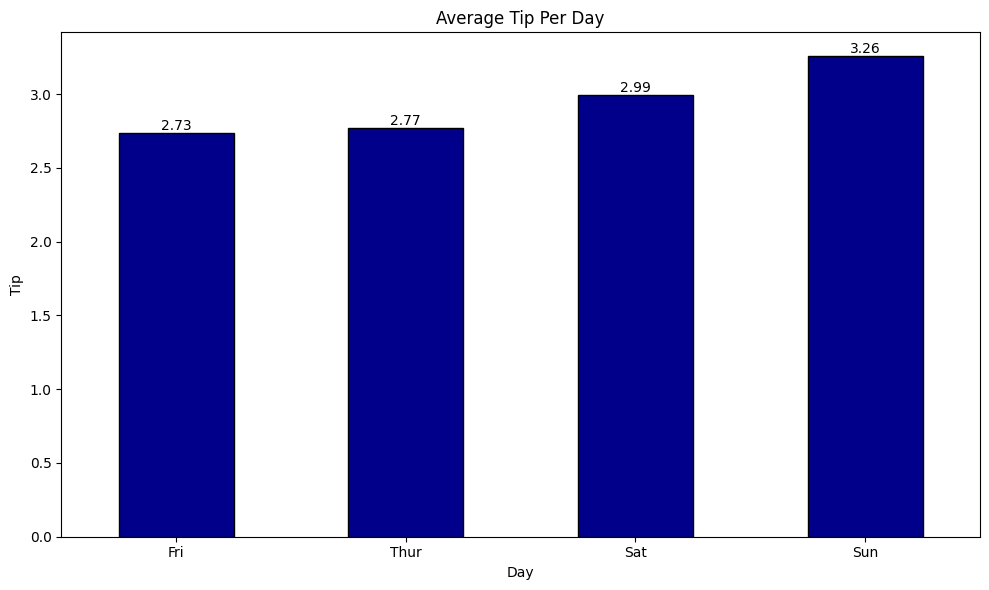

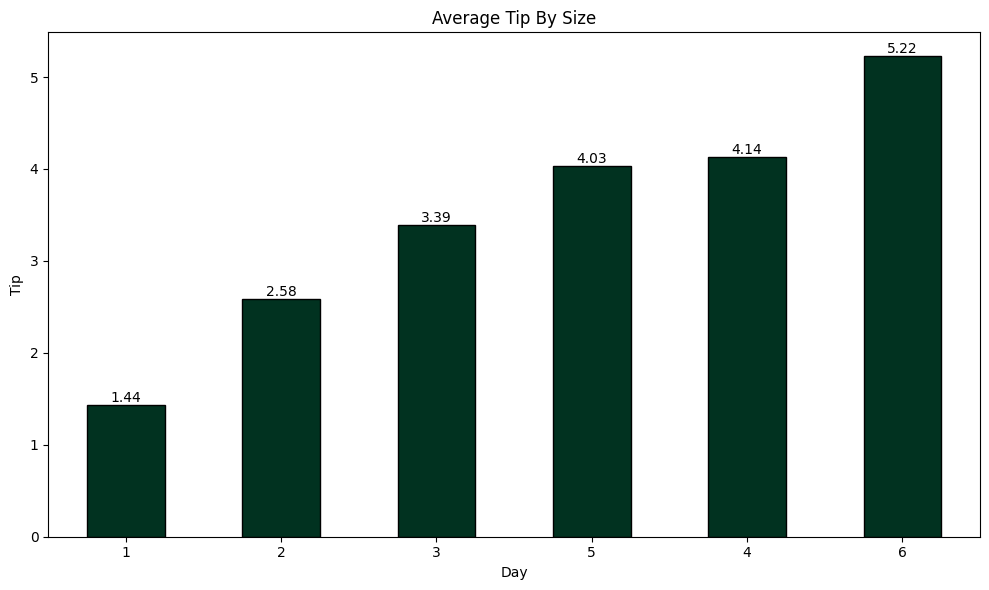

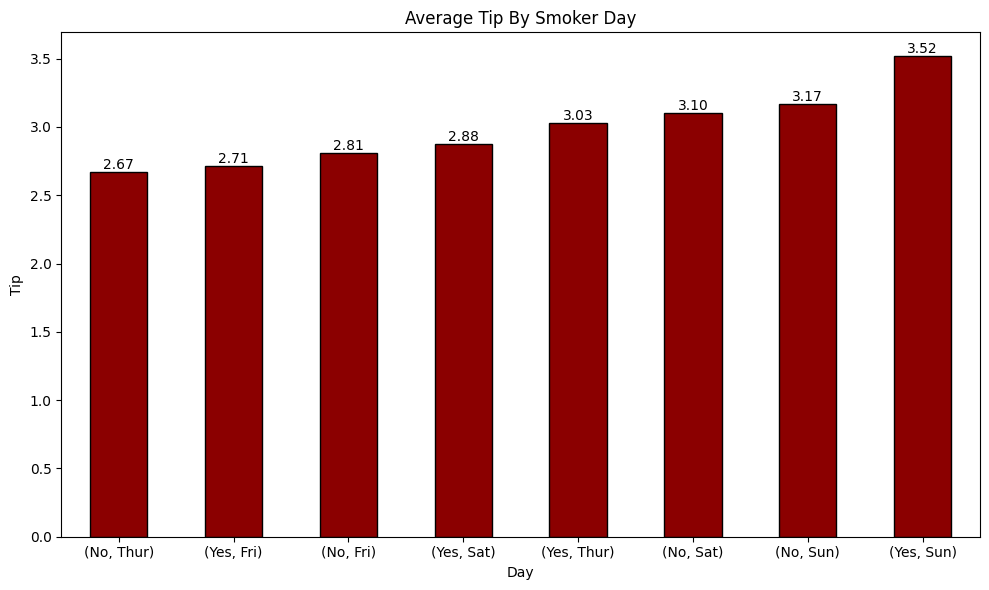

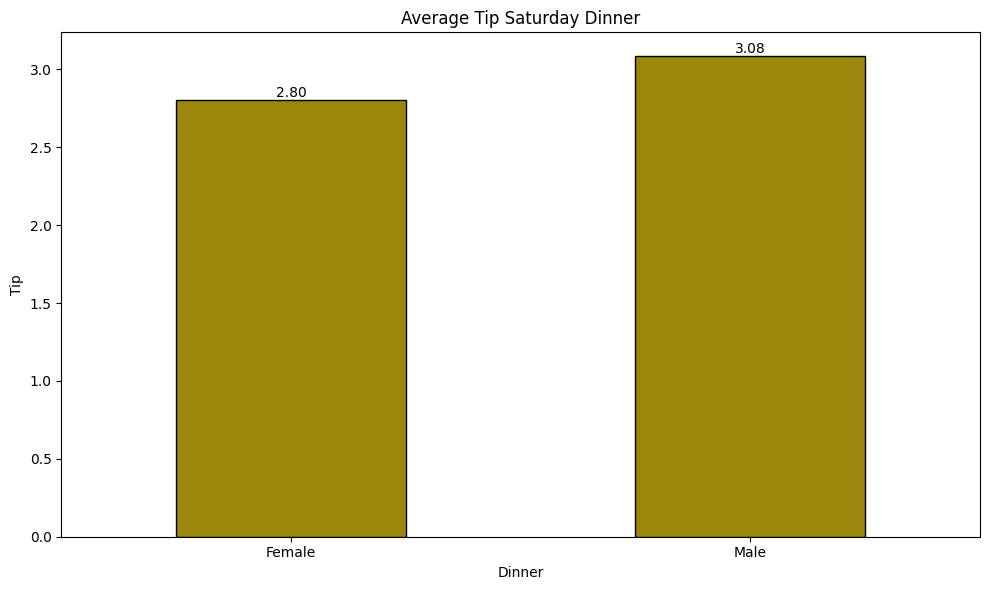

In [34]:
plot_bar(
    sorted_mean_tip_per_day,
    title='Average Tip Per Day',
    xlabel='Day',
    ylabel='Tip',
    colors='#00008b'
)

plot_bar(
    sorted_mean_tip_by_size,
    title='Average Tip By Size',
    xlabel='Day',
    ylabel='Tip',
    colors='#013220'
)

plot_bar(
    sorted_mean_tip_by_smoker_day,
    title='Average Tip By Smoker Day',
    xlabel='Day',
    ylabel='Tip',
    colors='#8B0000'
)

plot_bar(
    sorted_mean_tip_Saturday_dinner,
    title='Average Tip Saturday Dinner',
    xlabel='Dinner',
    ylabel='Tip',
    colors='#9B870C'
)

